In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('datasets_8538_11952_Train.csv')
df.sample(5)

FileNotFoundError: [Errno 2] File datasets_8538_11952_Train.csv does not exist: 'datasets_8538_11952_Train.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df['Item_Fat_Content'].value_counts() ## Data mismatch

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'])
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value='High')
df['Item_Weight'] = df['Item_Weight'].fillna(value=df['Item_Weight'].median())

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

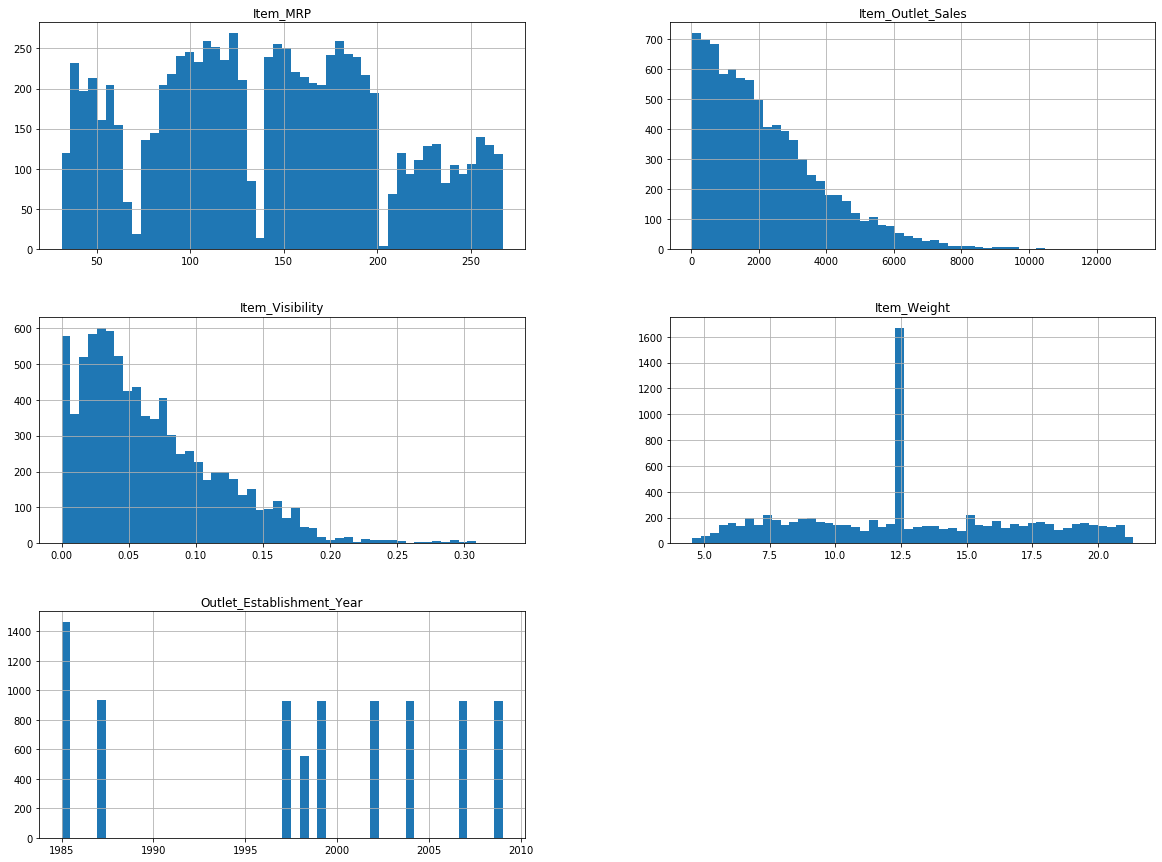

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
corr_matrix = df.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.009693
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

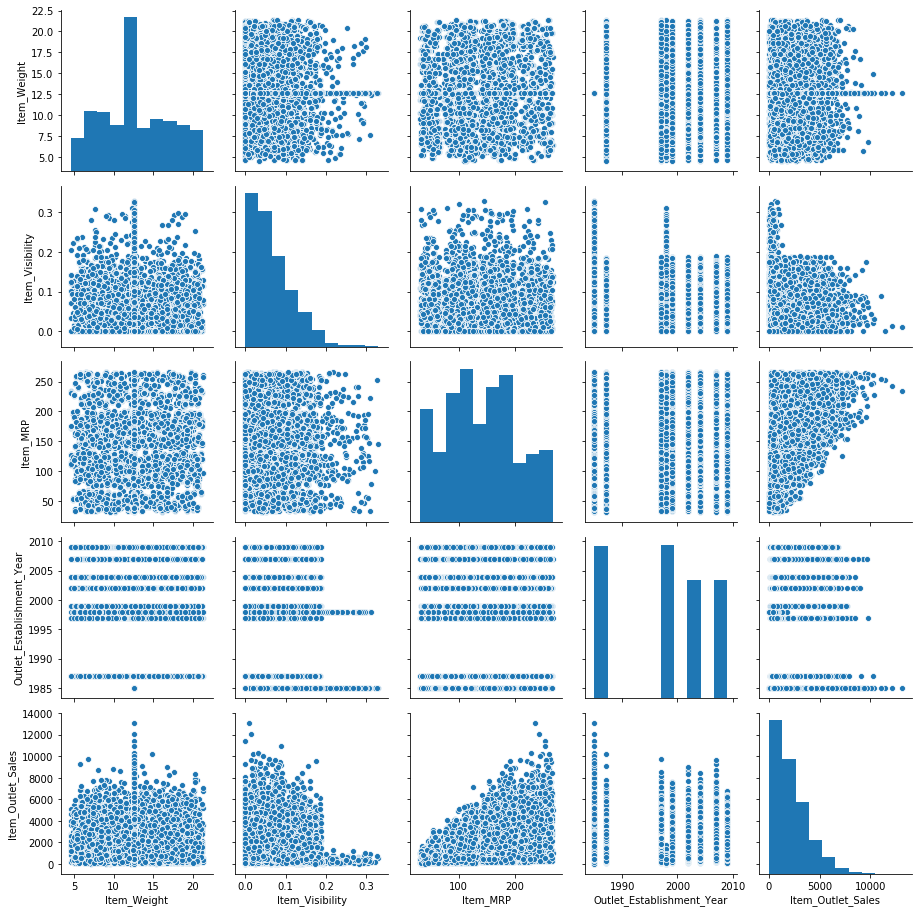

In [13]:
sns.pairplot(df)
plt.show()

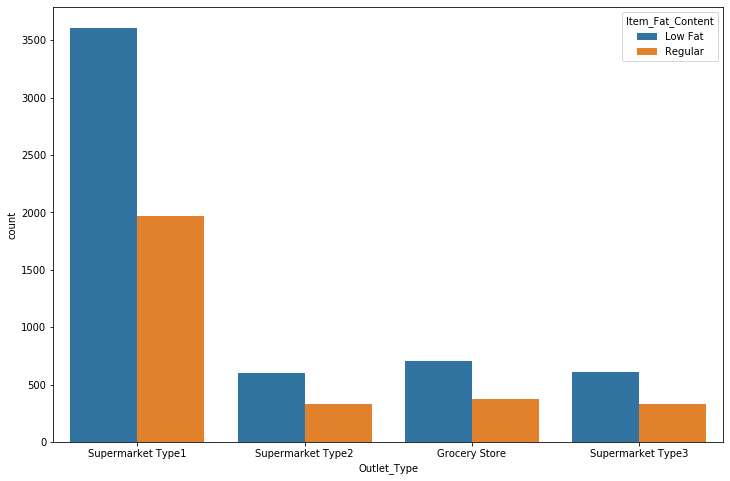

In [14]:
fig = plt.figure(figsize=(12,8))
sns.countplot(df['Outlet_Type'],hue=df['Item_Fat_Content'])

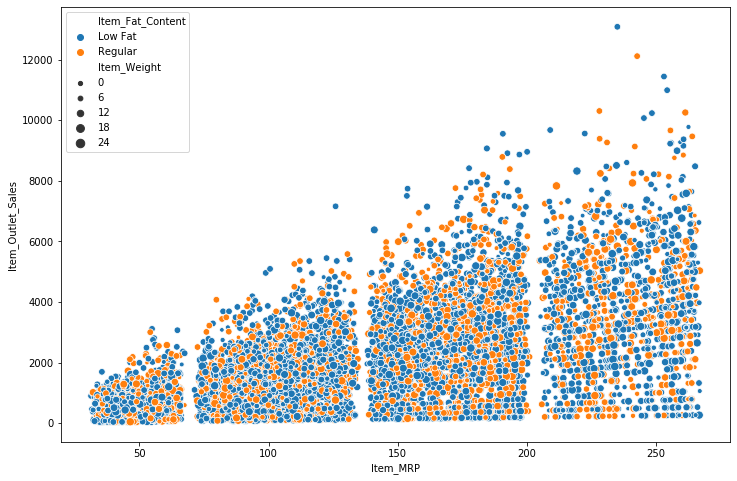

In [15]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight')

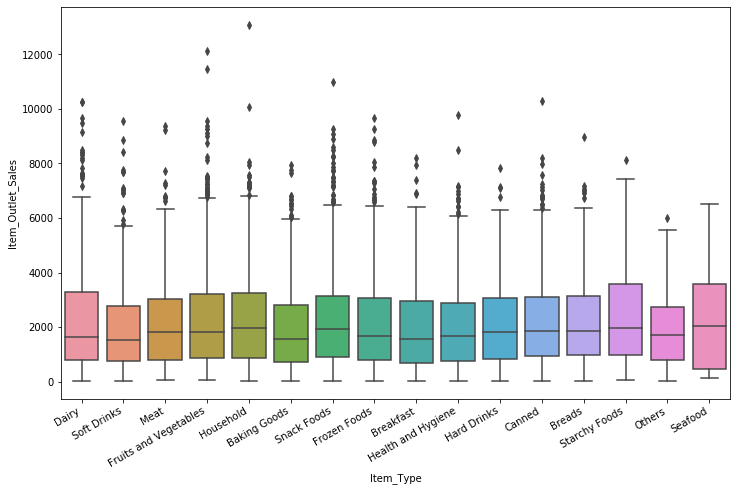

In [16]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Item_Type',y='Item_Outlet_Sales')
fig.autofmt_xdate()

In [17]:
import plotly.express as px

fig = px.pie(values = 'Item_Outlet_Sales',names = 'Item_Type',data_frame = df,title = 'Item sales by item Type')
fig.show()

In [18]:
df2 = df.groupby('Item_Identifier').mean().head(10)
df2

Item_Weight  Item_Visibility    Item_MRP  \
Item_Identifier                                             
DRA12              11.600000         0.031956  141.865400   
DRA24              17.421429         0.048062  164.086800   
DRA59               9.352500         0.134718  185.179900   
DRB01               9.126667         0.082126  189.586333   
DRB13               6.115000         0.008002  189.693000   
DRB24               8.785000         0.020624  154.465600   
DRB25              12.350000         0.077305  106.893800   
DRB48              16.157143         0.023700   39.253629   
DRC01               7.033333         0.019219   48.969200   
DRC12              17.850000         0.037893  190.218800   

                 Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Identifier                                                
DRA12                          2001.166667        1843.600200  
DRA24                          1995.000000        2246.218971  
DRA59                          1995.875000        2614.430150  
DRB01                          1990.333333        1518.024000  
DRB13                          1999.000000        2428.838400  
DRB24                          2003.000000        3050.695600  
DRB25                          1998.333333        1661.503900  
DRB48                          1996.714286         622.903457  
DRC01                          1997.833333         862.211000  
DRC12                          2001.750000        2237.420900

In [19]:
fig2 = px.scatter(data_frame=df2,x= df2.index ,y='Item_Outlet_Sales',size='Item_Weight')
fig2.show()

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
x = train_set.drop("Item_Outlet_Sales",axis=1)
x2 = test_set.drop("Item_Outlet_Sales",axis=1)
y = train_set["Item_Outlet_Sales"].copy()
y2 = test_set["Item_Outlet_Sales"].copy()

In [22]:
x_num = x[['Item_MRP','Item_Weight','Outlet_Establishment_Year','Item_Visibility']]
x_num2 = x2[['Item_MRP','Item_Weight','Outlet_Establishment_Year','Item_Visibility']]
x_num

Item_MRP  Item_Weight  Outlet_Establishment_Year  Item_Visibility
549   171.3448        9.500                       1999         0.035206
7757  170.5422       18.000                       2002         0.047473
764   111.7202       17.600                       1997         0.076122
6867   41.6138        8.325                       2002         0.029845
2716  155.5630       12.850                       1997         0.137228
...        ...          ...                        ...              ...
5734  139.1838        9.395                       1998         0.286345
5191   75.6670       15.600                       2007         0.117575
5390  237.3590       17.600                       2002         0.018944
860   117.9466       20.350                       2007         0.054363
7270   95.7410       16.350                       1997         0.016993

[6818 rows x 4 columns]

In [23]:
x_cat = x[-x.isin(x_num)]
x_cat = x_cat.dropna(axis=1)
x_cat2 = x2[-x.isin(x_num)]
x_cat2 = x_cat2.dropna(axis=1)
x_cat

Item_Identifier Item_Fat_Content              Item_Type  \
549            FDW44          Regular  Fruits and Vegetables   
7757           NCF54          Low Fat              Household   
764            FDY03          Regular                   Meat   
6867           FDQ20          Low Fat  Fruits and Vegetables   
2716           FDP34          Low Fat            Snack Foods   
...              ...              ...                    ...   
5734           FDY08          Regular  Fruits and Vegetables   
5191           FDC41          Low Fat           Frozen Foods   
5390           NCQ53          Low Fat     Health and Hygiene   
860            FDL46          Low Fat            Snack Foods   
7270           NCN30          Low Fat              Household   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
549             OUT049      Medium               Tier 1  Supermarket Type1  
7757            OUT045        High               Tier 2  Supermarket Type1  
764             OUT046       Small               Tier 1  Supermarket Type1  
6867            OUT045        High               Tier 2  Supermarket Type1  
2716            OUT046       Small               Tier 1  Supermarket Type1  
...                ...         ...                  ...                ...  
5734            OUT010        High               Tier 3      Grocery Store  
5191            OUT017        High               Tier 2  Supermarket Type1  
5390            OUT045        High               Tier 2  Supermarket Type1  
860             OUT017        High               Tier 2  Supermarket Type1  
7270            OUT046       Small               Tier 1  Supermarket Type1  

[6818 rows x 7 columns]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [25]:
from sklearn.compose import ColumnTransformer

num_attribs = list(x_num)
cat_attribs = list(x_cat)
cat_attribs.remove('Item_Identifier')
cat_attribs.remove('Outlet_Identifier')
print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

x_prepared = full_pipeline.fit_transform(x)
x_prepared2 = full_pipeline.fit_transform(x2)
x_prepared.toarray()

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


array([[ 0.47070929, -0.78945628,  0.13616916, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45787656,  1.22142058,  0.49352147, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48262534,  1.12679108, -0.10206572, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52620691,  1.12679108,  0.49352147, ...,  1.        ,
         0.        ,  0.        ],
       [-0.38307175,  1.77736889,  1.08910867, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73811593,  0.8310739 , -0.10206572, ...,  1.        ,
         0.        ,  0.        ]])

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [27]:
linear.fit(x_prepared,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predicted = linear.predict(x_prepared2)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

lin_mse = mean_squared_error(y2, predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1074.8381201743352

In [30]:
print('Coefficient of determination: %.2f'
      % r2_score(y2, predicted))

Coefficient of determination: 0.57


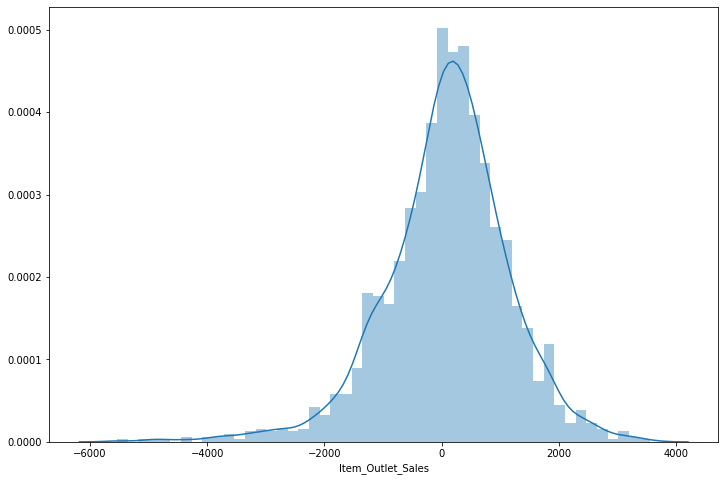

In [49]:
fig = plt.figure(figsize=(12,8))
sns.distplot(predicted - y2,bins=50)

In [57]:
dict_compare = {'Sales' :  y2,'Predicted' : predicted}
compare = pd.DataFrame(dict_compare)
print(compare.to_string())

           Sales    Predicted
7503   1743.0644  1395.598490
2957    356.8688   757.593040
7031    377.5086   911.391641
1084   5778.4782  4314.673024
856    2356.9320  3442.469136
4304    865.5400   667.828499
2132   4613.9940  4851.267076
1385   2410.8618  2121.667670
5239   1948.1308  1451.992071
6516   1937.4780  2876.570157
4509    210.3928  -158.848013
1670    255.0014  2206.366334
4313   4541.4218  3940.290447
1623    657.8104   987.780273
5220    578.5802   808.078086
6753   4229.1616  4466.079921
315    1267.0174  1923.278658
3524   2388.8904  1887.553069
7716   1797.6600  2035.730610
2083   4447.5440  3300.824986
4463   2570.6538  3259.864167
4411   1779.6834  2771.648921
2112   4211.1850  3011.813405
1057   3912.2408  2582.560547
868    2366.9190  4245.895552
700    1298.3100  2302.069889
6903    149.8050   754.335892
4087   3916.2356  3895.774264
4562   2065.3116  3170.549219
8222   3029.3900  3992.684790
7660    788.3072   870.985945
5571   2566.6590  2852.241611
8407    57

# Support vector Regression (kernel = linear)

In [31]:
from sklearn.svm import SVR
svr_li = SVR(kernel = 'linear')
svr_li.fit(x_prepared,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
predict_svr_li = svr_li.predict(x_prepared2)
predict_svr_li

array([1364.93754118,  606.26601153, 1076.72727215, ...,  874.32869702,
        585.14903959, 1729.7264788 ])

In [33]:
svr_li_mse = mean_squared_error(y2, predict_svr_li)
svr_li_rmse = np.sqrt(svr_li_mse)
svr_li_rmse

1242.783301593715

In [34]:
print('Coefficient of determination: %.2f'
      % r2_score(y2, predict_svr_li))

Coefficient of determination: 0.43


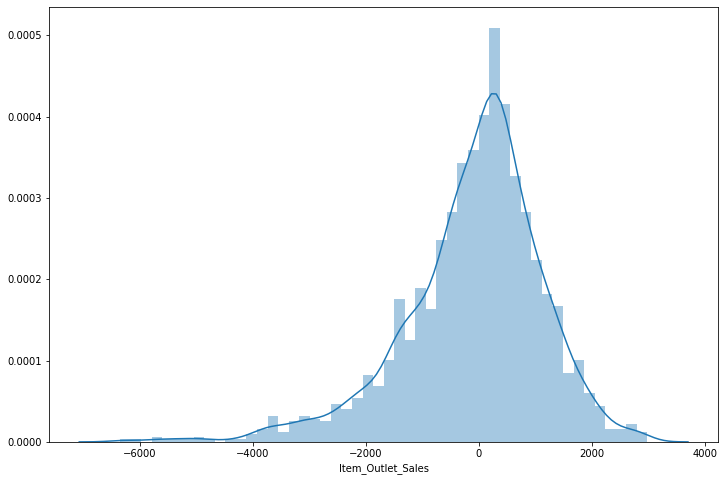

In [66]:
fig = plt.figure(figsize=(12,8))
sns.distplot(predict_svr_li - y2,bins=50)

In [67]:
dict_compare = {'Sales' :  y2,'Predict_svr_li' : predict_svr_li}
compare = pd.DataFrame(dict_compare)
print(compare.to_string())

           Sales  Predict_svr_li
7503   1743.0644     1364.937541
2957    356.8688      606.266012
7031    377.5086     1076.727272
1084   5778.4782     2935.147765
856    2356.9320     2913.296897
4304    865.5400      925.426549
2132   4613.9940     3188.770958
1385   2410.8618     2083.440089
5239   1948.1308     1514.633431
6516   1937.4780     2689.117932
4509    210.3928     1253.539496
1670    255.0014     2997.434235
4313   4541.4218     3463.138005
1623    657.8104     1075.000116
5220    578.5802      756.677354
6753   4229.1616     3638.981698
315    1267.0174     1737.332857
3524   2388.8904     1473.739240
7716   1797.6600     1974.419932
2083   4447.5440     1961.973021
4463   2570.6538     2810.673607
4411   1779.6834     2449.472286
2112   4211.1850     2705.636285
1057   3912.2408     2408.077881
868    2366.9190     3515.309961
700    1298.3100     1400.875170
6903    149.8050     1255.927118
4087   3916.2356     3579.492272
4562   2065.3116     2759.617174
8222   302

# Support vector Regression (kernel =rbf)

In [35]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(x_prepared,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
predict_svr_rbf = svr_rbf.predict(x_prepared2)
predict_svr_rbf

array([1668.71203465, 1520.37891112, 1543.99813651, ..., 1589.73212823,
       1587.32811819, 1724.17583123])

In [37]:
svr_rbf_mse = mean_squared_error(y2, predict_svr_rbf)
svr_rbf_rmse = np.sqrt(svr_rbf_mse)
svr_rbf_rmse

1575.1704847025294

In [38]:
print('Coefficient of determination: %.2f'
      % r2_score(y2, predict_svr_rbf))

Coefficient of determination: 0.09


# Desision Tree Regression

In [39]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr.fit(x_prepared,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
predict_dtr = dtr.predict(x_prepared2)
predict_dtr

array([1228.401 ,  652.484 ,  597.2226, ...,  633.8416,  377.5086,
       4695.2216])

In [41]:
dtr_mse = mean_squared_error(y2, predict_dtr)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

1509.9656803363334

In [42]:
print('Coefficient of determination: %.2f'
      % r2_score(y2, predict_dtr))

Coefficient of determination: 0.16


# Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [44]:
rfr.fit(x_prepared,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
predict_rfr = rfr.predict(x_prepared2)
predict_rfr

array([1191.489048,  903.117752,  619.014234, ...,  647.084362,
        467.611314, 2131.485462])

In [46]:
rfr_mse = mean_squared_error(y2, predict_rfr)
rfr_rmse = np.sqrt(rfr_mse)
rfr_rmse

1091.8031214010546

In [47]:
print('Coefficient of determination: %.2f'
      % r2_score(y2, predict_rfr))

Coefficient of determination: 0.56
